<a href="https://colab.research.google.com/github/wfaquieri/mit-infnet/blob/main/code_winiciusfaquieri_processamento_linguagem_natural_python_pd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Disciplina de Processamento de Linguagem Natural com Python

Bem-vindo ao projeto de disciplina de **Processamento de Linguagem Natural com Python**. Ao longo das últimas aulas vimos uma série de aplicações que nos deram a amplitude de possibilidades em trabalhar com textos. Para tal, usamos diversas bibliotecas, onde as que mais se destacaram foram NLTK, SPACY e GENSIM.

Esse notebook servirá de guia para a execução de uma análise de tópicos completa, usando o algoritmo de LDA e recursos para interpretação dos resultados. Utilizaremos notícias da seção "Mercado" extraídas da Folha de S. Paulo no ano de 2016.  Complete a análise com os códigos que achar pertinente e responda as questões presentes no Moodle. Boa sorte!

## O Notebook

Nesse notebook, você será guiado pela análise de **Extração de Tópicos**. As seguintes tarefas serão realizadas


1.   Download dos dados provenientes do kaggle 
2.   Seleção dos dados relevantes para a nossa análise
3.   Instalação das principais ferramentas e importação de módulos
4.   Pré-processamento usando NLTK
5.   Pré-processamento usando Spacy
6.   Análise de tópicos usando LDA
7.   Análise de NER usando Spacy
8.   Visualização dos tópicos usando tokens e entidades.



## Instruções para baixar os dados

Para baixar os dados será necessário o uso do gerenciador de downloads da Kaggle. A Kaggle, uma subsidiária do grupo Alphabet (Google), é uma comunidade on-line de cientistas de dados e profissionais de aprendizado de máquina.

Para utilizar o gerenciador, será necessário criar uma conta no site Kaggle.com.
Com a conta criada, obtenha um token de acesso, no formato kaggle.json

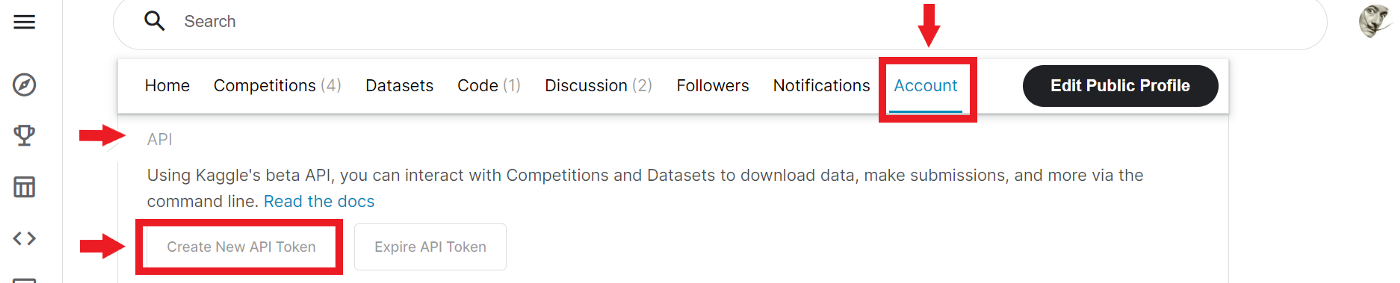

Em posse do token (baixe para seu computador), execute a células da próxima seção para acessar os dados de interesse e baixá-los.

# Baixe os dados

Instale o gerenciador kaggle no ambiente do Colab e faça o upload do arquivo kaggle.json 

In [ ]:
!pip install -q kaggle
!rm -rf kaggle.json
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"winiciusfaquieri","key":"023af8923fc97511459fed2a9180f211"}'}

Crie a pasta .kaggle

In [ ]:
!rm -rf .kaggle
!mkdir .kaggle
!cp kaggle.json .kaggle/
!chmod 600 .kaggle/kaggle.json

Baixe o dataset

In [ ]:
!mv .kaggle /root/
!kaggle datasets download --force -d marlesson/news-of-the-site-folhauol

 95% 178M/187M [00:01<00:00, 101MB/s] 
100% 187M/187M [00:02<00:00, 97.1MB/s]


## Criar o DataFrame com os dados lidos diretamente da plataforma Kaggle

In [ ]:
import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()

df = pd.read_csv("news-of-the-site-folhauol.zip")

In [ ]:
## Visualizando o dataset
df.head()

,title,text,date,category,subcategory,link
0,"Lula diz que está 'lascado', mas que ainda tem...",Com a possibilidade de uma condenação impedir ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
1,"'Decidi ser escrava das mulheres que sofrem', ...","Para Oumou Sangaré, cantora e ativista malines...",2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
2,Três reportagens da Folha ganham Prêmio Petrob...,Três reportagens da Folha foram vencedoras do ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
3,Filme 'Star Wars: Os Últimos Jedi' ganha trail...,A Disney divulgou na noite desta segunda-feira...,2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
4,CBSS inicia acordos com fintechs e quer 30% do...,"O CBSS, banco da holding Elopar dos sócios Bra...",2017-09-10,mercado,NaN,http://www1.folha.uol.com.br/mercado/2017/10/1...


In [ ]:
## Visualizando as categorias distintas
print('Visualizando as categorias:')
print(df.category.unique())

Visualizando as categorias:
['poder' 'ilustrada' 'mercado' 'mundo' 'esporte' 'tec' 'cotidiano'
 'ambiente' 'equilibrioesaude' 'sobretudo' 'colunas' 'educacao' 'tv'
 'banco-de-dados' 'opiniao' 'ciencia' 'paineldoleitor' 'saopaulo'
 'ilustrissima' 'seminariosfolha' 'turismo' 'empreendedorsocial'
 'serafina' 'asmais' 'o-melhor-de-sao-paulo' 'bbc' 'comida' 'musica'
 'folhinha' 'especial' 'treinamento' 'multimidia' 'cenarios-2017'
 'topofmind' 'dw' 'ombudsman' 'contas-de-casa' 'mulher' '2016'
 'guia-de-livros-discos-filmes' 'treinamentocienciaesaude' 'rfi' 'vice'
 'bichos' 'euronews' 'guia-de-livros-filmes-discos' 'infograficos' '2015']


In [ ]:
## Otendo mais algumas informaçoes sobre o dataset
print('O datatset está bem preenchido, apenas a coluna subcategory apresenta uma percentagem alta de valores nulos:')
df.info()

O datatset está bem preenchido, apenas a coluna subcategory apresenta uma percentagem alta de valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167053 entries, 0 to 167052
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   title        167053 non-null  object
 1   text         166288 non-null  object
 2   date         167053 non-null  object
 3   category     167053 non-null  object
 4   subcategory  29635 non-null   object
 5   link         167053 non-null  object
dtypes: object(6)
memory usage: 7.6+ MB


# Atualizar o SPACY e  instalar os modelos pt_core_news_lg

In [ ]:
# Atualizando o spaCy e instalando o pipeline pt_core_news_lg (treinado para o idioma PT)
!pip install -U spacy 
!pip install -U tf-estimator-nightly 
!python -m spacy download pt_core_news_lg

import spacy
from spacy.lang.pt.stop_words import STOP_WORDS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 568.2 MB 7.3 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


## Instalar os datasets `stopwords`, `punkt` e `rslp` do nltk

In [ ]:
import nltk

# Instalando os datasets stopwords, punkt e rslp do nltk
nltk.download('punkt')
nltk.download("stopwords")
nltk.download("rslp")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

## Carregar os módulos usados ao longo desse notebook

In [ ]:
!pip install pyldavis &> /dev/null

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import numpy as np

import pyLDAvis
import pyLDAvis.sklearn

from wordcloud import WordCloud

import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain

from typing import List, Set, Any


SEED = 123

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


# Filtrando os dados para utilizar apenas as notícias do ano de 2016 e da categoria "Mercado"

Filtre os dados do DataFrame df e crie um DataFrame news_2016 que contenha apenas notícias de **2016** e da categoria **mercado**.

In [ ]:
# Alterando o formato da data para datetime
df['date'] = pd.to_datetime(df.date)

# Criando um dataframe nomeado 'news_2016'
news_2016 = df.query('date >= "2016-01-01" and date <= "2016-12-31" and category == "mercado"')

display(news_2016) 

,title,text,date,category,subcategory,link
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
...,...,...,...,...,...,...
94280,Previsões para economia dependem de rumos do g...,"Para o economista Rodolfo Margato, do banco Sa...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...
94295,Repelentes e água de coco lideram a lista de s...,"Conveniência, saúde, boa forma e prazer. As te...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...
94301,Renda em queda leva mais pessoas às filas de e...,"Com o rendimento em queda, mais pessoas são fo...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...
94310,"Brasil pode perder até 2,2 milhões de vagas fo...","O Brasil pode perder até 2,2 milhões de vagas ...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...


In [ ]:
# “Pickling”
news_2016.to_pickle("news_2016.pickle")

# news_2016 = read_pickle("news_2016.pickle")

In [ ]:
# Verificando a presença de textos repetidos # Optamos por não tratar esse problema e manter a base com 7943 linhas, conforme questionário q.5.
news_2016.text.value_counts().head()

A Folha, em parceria com a faculdade ESPM, realiza na terça (7), às 15h, nova rodada do Arena do Marketing, evento voltado a debater o universo da publicidade e da propaganda no Brasil. O programa terá transmissão ao vivo pelo site da "TV Folha".  As medidas anticorrupção no mercado publicitário serão o tema desta edição.  Participarão do programa Orlando Marques, presidente da Associação Brasileira das Agências de Publicidade, e o advogado José Ricardo Martins.  A mediação será da jornalista Mariana Barbosa.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

## NLTK Tokenizer and Stemmer

Crie uma coluna no dataframe `news_2016` contendo os tokens para cada um dos textos. Os tokens devem estar representados pelo radical das palavras (stem). 
Para tal, complete o conteúdo da função `tokenize`.

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import RSLPStemmer

def tokenize(text: str) -> List:
  """
  Function for tokenizing using `nltk.tokenize.word_tokenize`
  
  Returns:
    - A list of stemmed tokens (`nltk.stem.RSLPStemmer`)
    IMPORTANT: Only tokens with alphabetic
               characters will be returned.
  """
  # text normalization
  tokens = nltk.word_tokenize(text, language='portuguese')
  words  = [token for token in tokens if token.isalpha()]
  st = RSLPStemmer()
  stemmed_tokens = [st.stem(token) for token in words]
  return ' '.join(stemmed_tokens)

news_2016.loc[:, 'nltk_tokens'] = news_2016.text.progress_map(tokenize)

  0%|          | 0/7943 [00:00<?, ?it/s]

In [ ]:
print('Como podemos notar ao utilizar stemming reduzimos o token à sua forma básica/raiz que, nesse caso, não precisa ser uma palavra existente no idioma \nou presente em um dicionário:\n')
news_2016.nltk_tokens

Como podemos notar ao utilizar stemming reduzimos o token à sua forma básica/raiz que, nesse caso, não precisa ser uma palavra existente no idioma 
ou presente em um dicionário:



34207    sou apen a mulh de um fazend diz christin cond...
34238    a cont do celul ou control fic mais car a part...
34245    a mai part do projet de ajust da cont públic a...
34248    desd as prim déc do sécul se diz que as not de...
34249    o cifr letr selec seman lanç na áre de negóci ...
                               ...                        
94280    par o econom rodolf margat do banc santand a e...
94295    conveni saúd boa form e praz as tend de consum...
94301    com o rend em qued mais pesso são forç a busc ...
94310    o brasil pod perd até milhã de vag com cart as...
94314    enquant brig com a falt de dinh em caix e com ...
Name: nltk_tokens, Length: 7943, dtype: object

## Criar uma documento SPACY para cada texto do dataset

Crie uma coluna `spacy_doc` que contenha os objetos spacy para cada texto do dataset de interesse. Para tal, carregue os modelos `pt_core_news_lg` e aplique em todos os textos (pode demorar alguns minutos...)

In [ ]:
# Carregando o pipeline e aplicando para cada texto do dataset
nlp = spacy.load("pt_core_news_lg")
news_2016.loc[:, 'spacy_doc'] = news_2016.text.progress_map(nlp)

  0%|          | 0/7943 [00:00<?, ?it/s]

## Realize a Lematização usando SPACY

O modelo NLP do spacy oferece a possiblidade de lematizar textos em português (o que não acontece com a biblioteca NLTK). Iremos criar uma lista de tokens
lematizados para cada texto do nosso dataset. Para tal, iremos retirar as 
stopwords, usando uma função que junta stopwords provenientes do NLTK e do Spacy. Essa lista completa, é retornada pela função stopwords (e você não precisa mexer).

Já a função filter retorna True caso o token seja composto por caracters alfabéticos, não estiver dentro da lista de stopwords e o lemma resultante não estiver contido na lista `o", "em", "em o", "em a" e "ano"`.

Crie uma coluna chamada `spacy_lemma` para armazenar o resultado desse pré-processamento.

In [ ]:
from nltk import text
def stopwords() -> Set:
    """
    Return complete list of stopwords
    """
    return set(list(nltk.corpus.stopwords.words("portuguese")) + list(STOP_WORDS))

complete_stopwords = stopwords()

def filter(w: spacy.lang.pt.Portuguese) -> bool:
    """
    Filter stopwords and undesired tokens
    """
    # Filtrando palavras irrelevantes
    return w.isalpha() and not(w in complete_stopwords) and not(w in ["o", "em", "em o", "em a", "ano"])

def lemma(doc: spacy.lang.pt.Portuguese) -> List[str]:
    """
    Apply spacy lemmatization on the tokens of a text

    Returns:
       - a list representing the standardized (with lemmatisation) vocabulary
    """ 
    # Aplicando a lematização para cada token 
    lemm_tokens = [token.lemma_ for token in doc if filter(token.lemma_)]
    return lemm_tokens   
    

news_2016.loc[:, 'spacy_lemma'] = news_2016.spacy_doc.progress_map(lemma)

  0%|          | 0/7943 [00:00<?, ?it/s]

In [ ]:
print('Diferentemente da técnica utilizada anteriormente, a lemmatization nos retorna palavras conhecidas no idioma, o que facilita a \nvisualização e entendimento dos dados em análise:\n')
news_2016.spacy_lemma

Diferentemente da técnica utilizada anteriormente, a lemmatization nos retorna palavras conhecidas no idioma, o que facilita a 
visualização e entendimento dos dados em análise:



34207    [mulher, fazendeiro, Christine, Conder, modést...
34238    [conta, celular, controle, ficar, cara, decisã...
34245    [projeto, ajuste, conta, público, aprovar, mau...
34248    [década, século, nota, ópera, sinfonia, brotar...
34249    [Cifras, Letras, selecionar, semanalmente, lan...
                               ...                        
94280    [economista, Rodolfo, Margato, banco, Santande...
94295    [conveniência, saúde, prazer, tendência, consu...
94301    [rendimento, queda, pessoa, forçar, buscar, fi...
94310    [Brasil, perder, milhão, vaga, carteira, assin...
94314    [briga, dinheiro, caixa, empreiteira, responsá...
Name: spacy_lemma, Length: 7943, dtype: object

## Reconhecimento de entidades nomeadas

Crie uma coluna `spacy_ner` que armazene todas as organizações (APENAS organizações) que estão contidas no texto.

In [ ]:
 def NER(doc: spacy.lang.pt.Portuguese):
  """
  Return the list of organizations for a SPACY document
  """
  # return [(ent.text, ent.label_) for ent in doc.ents if ent.label_ == "ORG"]
  return [(ent.text) for ent in doc.ents if ent.label_ == "ORG"]

news_2016.loc[:, 'spacy_ner'] = news_2016.spacy_doc.progress_map(NER)

  0%|          | 0/7943 [00:00<?, ?it/s]

In [ ]:
news_2016.spacy_ner

34207    [Ofcom, JFDI, Membro da Ordem do Império Britâ...
34238    [Oi, TIM, Claro, Vivo, Secretaria de Estado da...
34245    [Executivo dos três Estados, Executivo, Assemb...
34248    [MIT, Instituto de Tecnologia de Massachusetts...
34249        [Sistema Financeiro Nacional AUTORES, Amazon]
                               ...                        
94280                           [FGV, Ibre, Fecomercio-SP]
94295    [Nielsen, Nielsen, Nielsen, Nielsen, OFF!, Nie...
94301                            [LCA, LCA, Fecomercio-SP]
94310    [LCA Consultores, GO Associados, Pnad, LCA, PM...
94314    [Engevix, BNDES, Aneel, Agência Nacional de En...
Name: spacy_ner, Length: 7943, dtype: object

## Bag-of-Words

Crie uma coluna `tfidf` no dataframe `news_2016`. Use a coluna `spacy_lemma` como base para cálculo do TFIDF. 
O número máximo de features que iremos considerar é 5000. E o token, tem que ter aparecido pelo menos 10 vezes (`min_df`) nos documentos. 

In [ ]:
class Vectorizer:
  def __init__(self, doc_tokens: List):
    self.doc_tokens = doc_tokens
    self.tfidf = None

  
  def vectorizer(self):
      """
      Convert a list of tokens to tfidf vector
      Returns the tfidf vector and attribute it to self.tfidf
      """
      # Vetorizando o texto
      self.tfidf =  TfidfVectorizer(lowercase=False,
                                    tokenizer = lambda w: w,
                                    min_df=10,
                                    max_features=5000)
      self.tfidf.fit(self.doc_tokens)
      # Vetor TF-IDF
      return self.tfidf

  def __call__(self):
    if self.tfidf is None:
        self.vectorizer()
    return self.tfidf

doc_tokens = news_2016.spacy_lemma.values.tolist()
vectorizer = Vectorizer(doc_tokens)

def tokens2tfidf(tokens):
    array =  vectorizer().transform([tokens]).toarray()[0]
    return array


news_2016.loc[:, 'tfidf'] = news_2016.spacy_lemma.progress_map(tokens2tfidf)

  0%|          | 0/7943 [00:00<?, ?it/s]

In [ ]:
news_2016.tfidf

34207    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
34238    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
34245    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
34248    [0.14817640083163133, 0.0, 0.0, 0.0, 0.0, 0.0,...
34249    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                               ...                        
94280    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
94295    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
94301    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
94310    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
94314    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: tfidf, Length: 7943, dtype: object

## Extração de Tópicos

Realize a extração de 9 tópicos usando a implementação do sklearn do algoritmo Latent Dirichlet Allocation. Como parâmetros, você irá usar o número máximo de iterações igual à 100 (pode demorar) e o `random_seed` igual a `SEED` que foi setado no início do notebook

In [ ]:
N_TOKENS = 9

corpus = np.array(news_2016.tfidf.tolist())
# Realizando a extração de 9 tópicos utilizando o método LDA - Latent Dirichlet Allocation
lda = LDA(n_components=N_TOKENS, max_iter=100,random_state=SEED).fit(corpus)

### Visualize os tópicos usando a ferramenta pyLDAVis

In [ ]:
# Visualizando os tópicos usando a ferramenta pyLDAVis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
corpus_matrix = np.matrix(corpus)
pyLDAvis.sklearn.prepare(lda, corpus_matrix, vectorizer())

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.000811 -0.084607       1        1  31.515514
2     -0.015078 -0.035483       2        1  30.602969
8      0.201569  0.018822       3        1  12.541536
0      0.009331 -0.182082       4        1  11.832804
4      0.238888  0.081312       5        1   8.180669
1     -0.111818  0.040435       6        1   1.416575
7     -0.115749  0.073315       7        1   1.389516
6     -0.105322  0.045777       8        1   1.274910
5     -0.101011  0.042510       9        1   1.245508, topic_info=            Term        Freq       Total Category  logprob  loglift
4810   trimestre  110.000000  110.000000  Default  30.0000  30.0000
4201       queda  154.000000  154.000000  Default  29.0000  29.0000
4990      índice  128.000000  128.000000  Default  28.0000  28.0000
2500       dólar  116.000000  116.000000  Default  27.0000  27.0000
1396        alta  119.000000  119.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
4808    trimestr    0.151960   11.072945   Topic9  -8.6352   0.0970
721        Macri    0.151565   14.843121   Topic9  -8.6378  -0.1986
4586  smartphone    0.151222   18.948168   Topic9  -8.6401  -0.4451
753    Meirelles    0.151063   48.550084   Topic9  -8.6412  -1.3870
3324      isento    0.150974    9.110842   Topic9  -8.6418   0.2855

[514 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1         2  0.112793      AB
1         9  0.789549      AB
4         9  0.827690     AES
7         4  0.912724     ANP
10        2  0.089551   AUTOR
...     ...       ...     ...
4990      1  0.046724  índice
4990      2  0.031149  índice
4990      3  0.770945  índice
4990      4  0.007787  índice
4990      5  0.140172  índice

[1218 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 9, 1, 5, 2, 8, 7, 6])

### Atribua a cada text, um (e apenas um) tópic. 

Crie uma coluna `topic` onde o valor é exatamente o tópico que melhor caracteriza o documento de acordo com o algoritmo de LDA.

In [ ]:
def get_topic(tfidf: np.array):
    """
    Get topic for a lda trained model
    """
    tfidf_array = np.matrix(tfidf)
    topics = lda.transform(tfidf_array)
    return np.argmax(topics)

news_2016['topic'] = news_2016.tfidf.progress_map(get_topic)

  0%|          | 0/7943 [00:00<?, ?it/s]

## Número de documentos vs tópicos 

Esse gráfico nos mostra quantos documentos foram caracterizados por cada tópico.

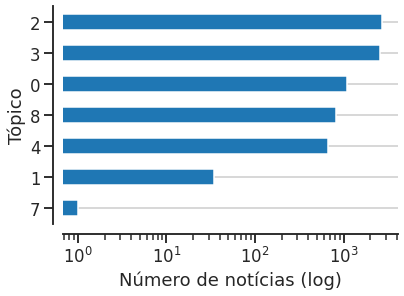

In [ ]:
with sns.axes_style("ticks"):
    sns.set_context("talk")
    ax = news_2016['topic'].value_counts().sort_values().plot(kind = 'barh')
    ax.yaxis.grid(True)
    ax.set_ylabel("Tópico")
    ax.set_xlabel("Número de notícias (log)")
    sns.despine(offset = 10)
    ax.set_xscale("log")

## Crie uma nuvem de palavra para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa. 

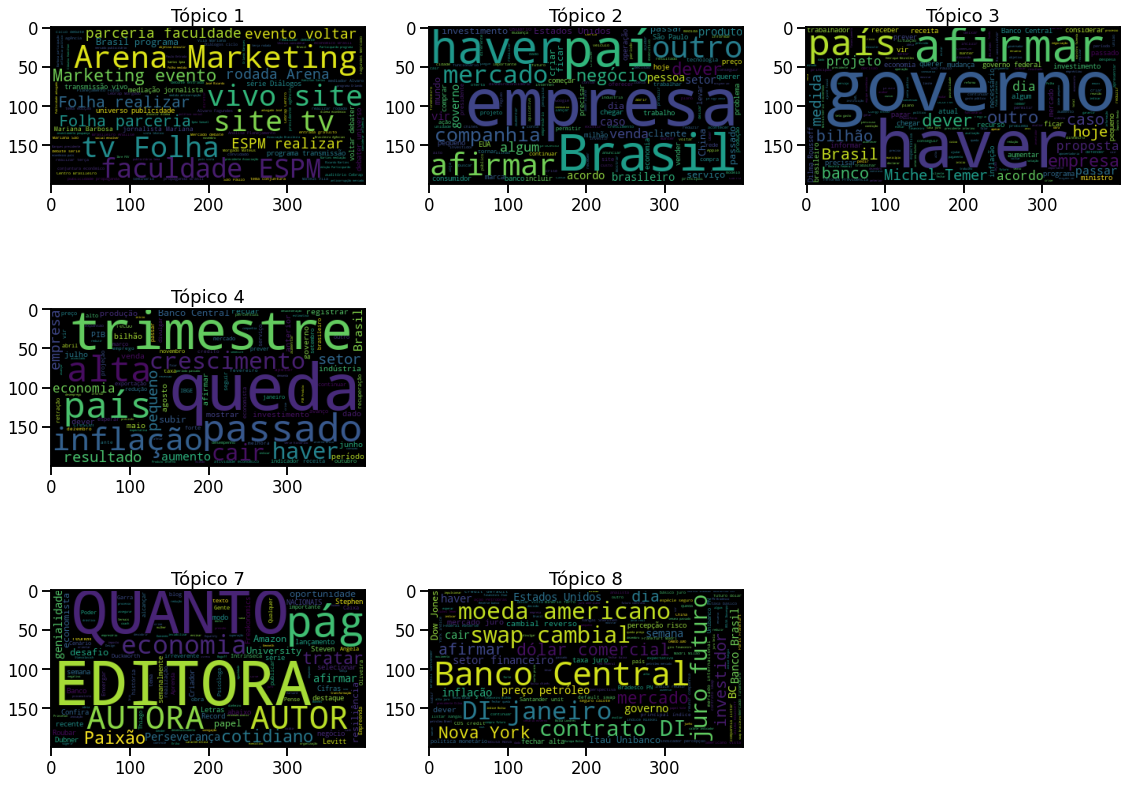

In [ ]:
def plot_wordcloud(text:str, ax:plt.Axes) -> plt.Axes:
    """
    Plot the wordcloud for the text/
    Arguments:
        -  text: string to be analised
        -  ax: plt subaxis
    Returns:
     - ax
    """
    wordcloud = WordCloud().generate(text)
    return ax.imshow(wordcloud)
    
def plot_wordcloud_for_a_topic(topic:int, ax:plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_words = chain(*topic_news.spacy_lemma.values.tolist())
    string_complete = ' '.join(list_of_words)
    if not string_complete:
        return None
    return plot_wordcloud(string_complete, ax)

fig, axis = plt.subplots(3, 3, figsize=(16, 12))

axis_  = axis.flatten()
for idx, ax in enumerate(axis_):
    ax_ = plot_wordcloud_for_a_topic(idx + 1, ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx + 1}")
fig.tight_layout()

## Crie uma nuvem de entidades para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa. 

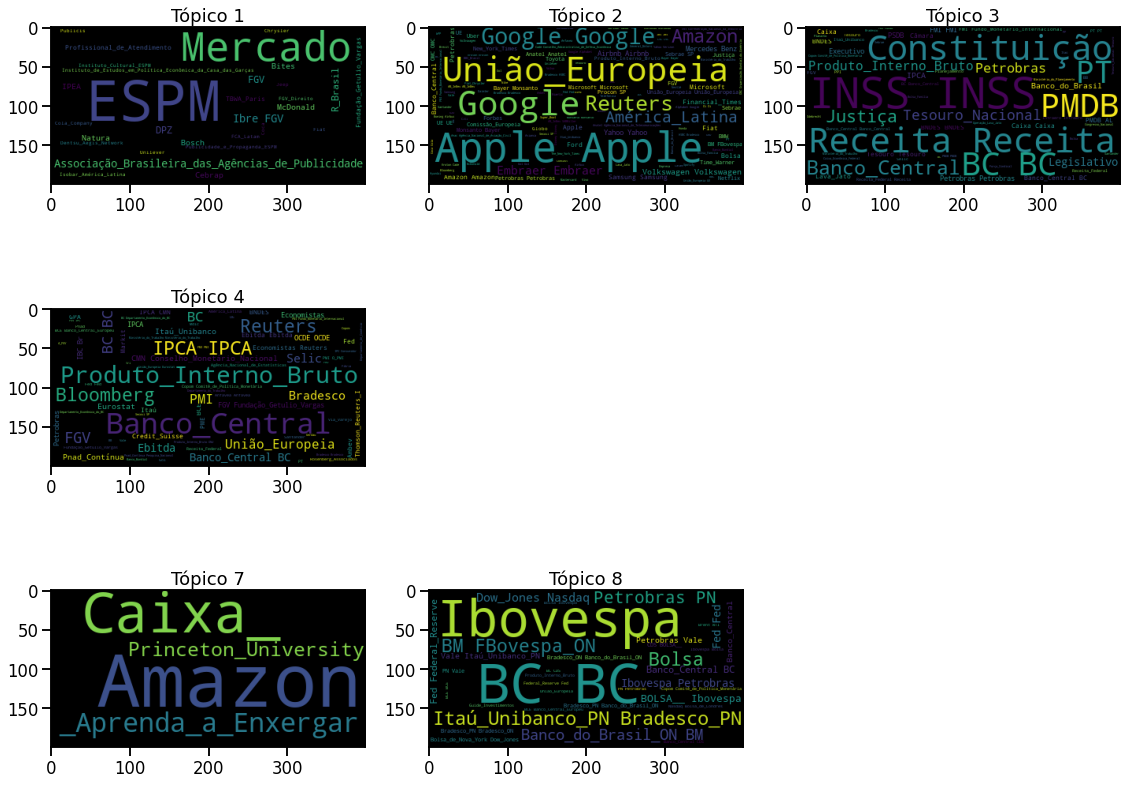

In [ ]:
def plot_wordcloud_entities_for_a_topic(topic:int, ax:plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_docs = topic_news.spacy_ner.apply(lambda l : [w.replace(" ", "_") for w in l])
    list_of_words = chain(*list_of_docs)
    string_complete = ' '.join(list_of_words)
    if not len(string_complete):
        return None
    return plot_wordcloud(string_complete, ax)

fig, axis = plt.subplots(3, 3, figsize=(16, 12))

axis_  = axis.flatten()
for idx, ax in enumerate(axis_):
    ax_ = plot_wordcloud_entities_for_a_topic(idx + 1, ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx + 1}")
fig.tight_layout()